In [4]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot = False)
'ok'

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


'done'

In [18]:
pixels, real_values = mnist.train.next_batch(10)

In [19]:
real_values

array([0, 2, 7, 1, 7, 0, 0, 5, 2, 3], dtype=uint8)

In [20]:
example_to_visualize = 5

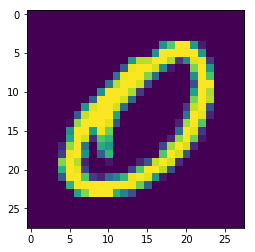

In [22]:
image = pixels[example_to_visualize,:]
image = np.reshape(image, [28, 28])
plt.imshow(image)

In [24]:
# K-nearest neighbours
mnist = input_data.read_data_sets("MNIST_data/", one_hot = True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [26]:
train_pixels, train_list_values = mnist.train.next_batch(100)
test_pixels, test_list_values = mnist.train.next_batch(10)

In [28]:
train_pixel_tensor = tf.placeholder('float', [None, 784])
test_pixel_tensor = tf.placeholder('float', [784])

In [40]:
distance = tf.reduce_sum(tf.abs(tf.add(train_pixel_tensor, tf.negative(test_pixel_tensor))), reduction_indices = 1)

In [42]:
pred = tf.argmin(distance, 0)

In [43]:
# Examples on tf.reduce_sum
x = [[1, 1, 1], [1, 1, 1]]
with tf.Session() as sess:
    print(sess.run(tf.reduce_sum(x))) # Reduce by flattening both rows and columns
    print(sess.run(tf.reduce_sum(x, 0))) # Reduce by flattening the rows
    print(sess.run(tf.reduce_sum(x, 1))) # Reduce by flattening the columns
    print(sess.run(tf.reduce_sum(x, 1, keep_dims = True)))
    print(sess.run(tf.reduce_sum(x, [0, 1]))) # Reduce by row 0 and column 1

6
[2 2 2]
[3 3]
[[3]
 [3]]
6


In [47]:
accuracy = 0
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    for i in range(len(test_list_values)):
        nn_index = sess.run(pred, feed_dict = {train_pixel_tensor: train_pixels,
                                               test_pixel_tensor: test_pixels[i, :]})
        print('Test:', i)
        print('Predicted:', np.argmax(train_list_values[nn_index]))
        print('True class:', np.argmax(test_list_values[i]), '\n')
        if np.argmax(train_list_values[nn_index]) == np.argmax(test_list_values[i]):
            accuracy += 1.0 / len(test_pixels)
print('Result:', accuracy)

Test: 0
Predicted: 1
True class: 1 

Test: 1
Predicted: 1
True class: 2 

Test: 2
Predicted: 7
True class: 7 

Test: 3
Predicted: 7
True class: 6 

Test: 4
Predicted: 7
True class: 9 

Test: 5
Predicted: 0
True class: 6 

Test: 6
Predicted: 6
True class: 6 

Test: 7
Predicted: 2
True class: 2 

Test: 8
Predicted: 3
True class: 3 

Test: 9
Predicted: 2
True class: 2 

Result: 0.6
